# DD2410 Planning Assignment Tutorial
Here we will walk through how to utilise the attributes and methods of the `mission` object.

First let's import `mission` so we can use it. Then we can import any other libraries we might find usefull, such as `numpy` and `matplotlib`.

In [1]:
from dd2410planning import mission
import numpy as np, matplotlib.pyplot as plt
np.set_printoptions(threshold=20)
%matplotlib inline

Now let's instantiate the `mission` object under the name `mis`

In [2]:
mis = mission()

Now, let's investigate its attributes.

First we have `origin`, which as the name suggests, is the starting position of the car. It is stored as a 2-dimensional `numpy` array.

In [3]:
print(mis.origin)

[ 0.1    12.8467]


The first element of the array `mis.origin[0]` is the x-position, wheras `mis.origin[1]` is the y-position. The x-position is sitatuated just off the environment boundary, while the y-position is randomly assigned within the boundaries.

Like the `origin`, the `target` is also stored as a 2 dimensional `numpy` array. Where the x-position is situated at the environment boundary and the y-position is randomly assigne within the boundaries.

In [4]:
print(mis.target)

[50.     21.4233]


The boundaries of the car's environment are represented by `xbound` and `ybound`, where the first members, `xbound[0]` and `ybond[0]`, are the lower bounds, and `xbound[1]` and `ybound[1]` are the upper bounds.

In [5]:
print(mis.xbound, mis.ybound)

[ 0. 50.] [ 0. 30.]


The 3 dimesnional `numpy` array `state` signifies the current state of the car, where the x and y positions are `state[0]` and `state[1]`, and the heading angle is `state[2]`. We see, upon instantiation that position matches the origin, i.e. `state[:2] ==  origin`.

In [6]:
print(mis.state)

[ 0.1    12.8467  0.    ]


The current time of the car's simulation is given by `time`, a `float`. We see that, upon instantiation, `time == 0`.

In [7]:
print(mis.time)

0.0


Now, let's investigate the trajectory records: `states`, `controls`, and `times`.

In [8]:
print(mis.states, mis.controls, mis.times)

[[ 0.1    12.8467  0.    ]] [] [0.]


We see here that `states` and `times` only contain the starting state and time, and `controls` is completely empty. These need to be added to, as we'll see later.

Now let's get into the methods.

The first method `set`, sets the mission `state` and `time` to a given state and time, as shown below:

In [9]:
print(mis.state, mis.time)                        # current state and time
mis.set(np.random.random(3), np.random.random(1)) # set to ranom state and time
print(mis.state, mis.time)                        # new state and time

[ 0.1    12.8467  0.    ] 0.0
[0.0118 0.9011 0.3425] 0.9280298883079368


As you can see, with `set` we can set the internal state and time.

If you want to set the state and time back to their original values, you can call `reset` as shown:

In [10]:
print(mis.state, mis.time) # current state and time
mis.reset()                # reset state and time
print(mis.state, mis.time) # original state and time

[0.0118 0.9011 0.3425] 0.9280298883079368
[ 0.1    12.8467  0.    ] 0.0


Note that `reset` also resets the records `states`, `times`, and `controls` to their original values, as we'll demonstrate later.

Now, suppose you want to add to the afformentioned records; in that case you can call `record`, which appends states, controls, and times to their respecive records, as shown below:

In [11]:
print(mis.states, mis.controls, mis.times) # current records
mis.record(np.random.random(3), np.random.random(), np.random.random()) # add single random state, control, and time
print(mis.states, mis.controls, mis.times) # new records
mis.record(np.random.random((4, 3)), np.random.random(4), np.random.random(4)) # add 4 random states, controls, and times
print(mis.states, mis.controls, mis.times) # new records
mis.reset() # reset the records again
print(mis.states, mis.controls, mis.times)

[[ 0.1    12.8467  0.    ]] [] [0.]
[[ 0.1    12.8467  0.    ]
 [ 0.0206  0.8369  0.101 ]] [0.8396] [0.     0.7108]
[[ 0.1    12.8467  0.    ]
 [ 0.0206  0.8369  0.101 ]
 [ 0.8433  0.5453  0.9252]
 [ 0.8997  0.5626  0.4052]
 [ 0.7114  0.2469  0.9265]
 [ 0.4602  0.6245  0.3164]] [0.8396 0.3261 0.9441 0.0044 0.2733] [0.     0.7108 0.1083 0.7122 0.0972 0.8936]
[[ 0.1    12.8467  0.    ]] [] [0.]


Now, let's move onto the `safe` method, which tells you whether a single position or a sequence of positions is safe.

First, let's show its implementation, by chossing random points within the environment bounds `xbound` and `ybound`, and plotting them using `plot_traj`, which we'll describe more about later.

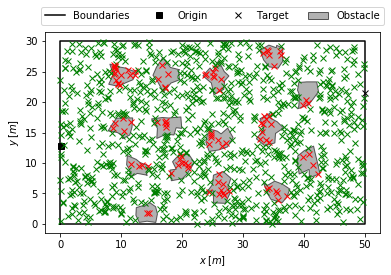

In [12]:
fig, ax = mis.plot_traj() # plot the environment
for _ in range(1000): # plot 1000 random points within boundaries
    x, y = np.random.uniform(*mis.xbound), np.random.uniform(*mis.ybound)
    if mis.safe([x,y]): ax.plot(x, y, 'gx') # plot in green if point is safe, red otherwise
    else: ax.plot(x, y, 'rx')
plt.show()

Now, let's take a look at the safety of position segments.

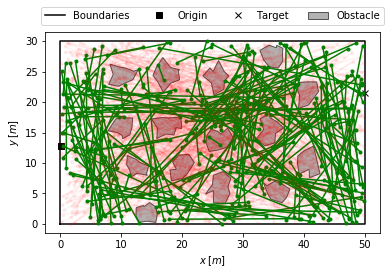

In [13]:
fig, ax = mis.plot_traj()
for _ in range(1000): # plot 1000 random line segments within boundaries
    x, y = np.random.uniform(*mis.xbound, (2, 1)), np.random.uniform(*mis.ybound, (2, 1))
    p = np.hstack((x, y))
    if mis.safe(p[0], p[1]): ax.plot(p[:,0], p[:,1], 'g.-')
    else: ax.plot(p[:,0], p[:,1], 'r.-', alpha=0.05)
plt.show()

Now, let's take a look at the `done` method, which tells us whether or not a position is approximately at the target. This method simply returns `True` or `False`. Just for fun let's visualise it, like we did with `safe`.

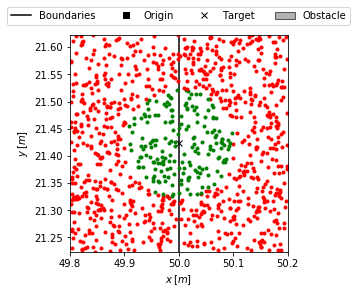

In [14]:
fig, ax = mis.plot_traj()
lb, ub = mis.target - 0.2, mis.target + 0.2 # area around target
for _ in range(1000): # 1000 random points within boundaries
    x, y = np.random.uniform(lb[0], ub[0]), np.random.uniform(lb[1], ub[1]) # random position
    p = np.array([x, y])
    d = np.linalg.norm(mis.target - p) # distance to target
    if mis.done(p): ax.plot(x, y, 'g.')
    else:  ax.plot(x, y, 'r.')
ax.set_xlim(lb[0], ub[0]); ax.set_ylim(lb[1], ub[1])
plt.show()

Now, let's take a look at the `step` method, which simulates the car's motion in time, given a steering angle control `u` between $[-\pi/2, \pi/2]$. 

This method accepts either a constant control `float` or a control function in the form `control_function(time, state)`.

In the simplest case, this method simulates the car's motion one step in time, where the time step-size is determine automatically, as shown below:

In [15]:
u = np.random.uniform(-0.3, 0.3)                # random constant control
uf = lambda t, s: np.random.uniform(-0.3, 0.3)  # random control function
print(mis.state, mis.time)                      # original state and time
state, control, time, safe, done = mis.step(uf) # take on step in time with control function
print(state, control, time)                     # results
print(mis.state, mis.time)                      # note that results not imposed

[ 0.1    12.8467  0.    ] 0.0
[ 0.15   12.8466 -0.0011] -0.024506787739090152 0.05
[ 0.1    12.8467  0.    ] 0.0


Note that the current state and time remain unchanged; however, if you wanted to make the change permanent you can invoke the `inplace` option. Below, we take a permanent step in time then reset.

In [16]:
print(mis.state, mis.time) # original state and time
mis.step(uf, inplace=True) # impose state and time change
print(mis.state, mis.time) # state and time changed
mis.reset()                # reset to original
print(mis.state, mis.time)

[ 0.1    12.8467  0.    ] 0.0
[ 0.15   12.8468  0.0071] 0.05
[ 0.1    12.8467  0.    ] 0.0


Additionally, if you wish for the step to be recorded into the records, you may invoke the `record` option, as shown below.

In [17]:
print(mis.states, mis.controls, mis.times) # original records
mis.step(uf, record=True)
print(mis.states, mis.controls, mis.times) # new records
mis.reset()
print(mis.states, mis.controls, mis.times) # original records

[[ 0.1    12.8467  0.    ]] [] [0.]
[[ 0.1    12.8467  0.    ]
 [ 0.1001 12.8467 -0.    ]] [-0.029] [0.     0.0001]
[[ 0.1    12.8467  0.    ]] [] [0.]


Note above that `record` and `inplace` act independantly.

If you desire to simulate the car's motion for a specific duration, you can invoke the `Dt` option. Below, we simulate the car's motion for 1 second and 100 seconds.

In [18]:
states, controls, times, safe, done = mis.step(uf, Dt=1)
print(times, safe, done)
states, controls, times, safe, done = mis.step(uf, Dt=100)
print(times, safe, done)

[0.0001 0.0002 0.0003 ... 0.9857 0.9939 1.    ] True False
[ 0.0096  0.0202  0.0327 ... 24.1494 24.1994 24.2494] False False


We see that the simulation of 1 second stopped at 1 second. However, the simulation of 100 seconds stopped early because `step` stops when either the motion was unsafe, due to an obstacle or boundaries, or it arrived at the `target`. In this case only `safe == False`, which means a collision occured, hence `times[-1] < 100`.

Lastly, incase you want more information, one may invoke the `verbose` option, in which simulation information is shown.

In [19]:
state, control, time, safe, done = mis.step(uf, verbose=True)

State: [ 0.1001 12.8467  0.    ]      Time: 0.000      Control: 0.275      Safe: True       Done: False     


Finally, we have `simulate`, which simulates a mission, given a sequences of `controls` and `times`, such that `len(controls) == len(times) - 1`,  where `controls[i]` is assumed to be constant between the times `times[i]` and `times[i+1]`. This method is used to validate the success of your sequences of controls and times, given the mission environment. Below we generate a seuquence of controls and times, then validate them.

In [20]:
mis.reset()
state, controls, times, safe, done = mis.step(uf, Dt=500, record=True)
print(len(mis.controls), len(mis.times))     # len(controls) = len(times) - 1
print('We made it {0:.2f}% to the target.'.format(mis.simulate(mis.controls, mis.times)*100))

1671 1672
We made it 31.04% to the target.


The `simulate` method returns the car's percent distance to the target. 

We can now visualise the simulation, using the last two methods `plot_traj` and `plot_records`, now that the records have been populated.

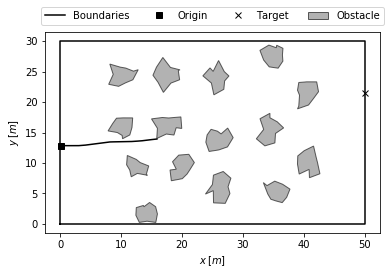

In [21]:
mis.plot_traj(); plt.show()

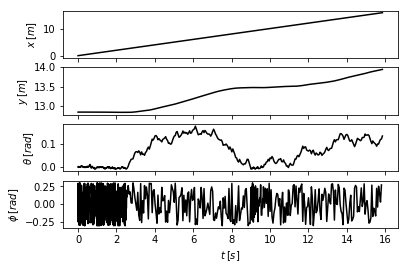

In [22]:
mis.plot_records(); plt.show()

## Assignment 

And that's basically it; you've learnt all you need to know about the `mission` object to design your own planning method.

Now your job is take make a function of the following form:
```python
from dd2410planning import mission
def main():
    mis = mission() # instantiate mission object
    ... # your stuff here
    return mis
```
that returns a `mission` object whose records are populated with a safe trajectory.

The `mission` object your function returns will be validated with `mission.validate` in the follwing way.
```python
mis = main() # obtain your solution
result = mis.validate(mis.controls, mis.times) # if this returns 1, you fully succeded!
```

Let's make an example! We'll try random controls, and return the best performance.

In [23]:
from dd2410planning import mission; import numpy as np, copy
def main():
    mis = mission()                                  # instantiate mission object
    u = lambda t, s: np.random.uniform(-0.3, 0.3)  # random control function
    dbest = np.linalg.norm(mis.target - mis.origin) # nominal distance to target
    for i in range(10): # simulate multiple times
        states, controls, times, safe, done = mis.step(u, Dt=500)
        d = np.linalg.norm(states[-1,:2] - mis.target)
        if d < dbest: # if new distance is better
            dbest = d
            mis.reset(); mis.record(states, controls, times)
    print('Best distance is {0:.2f} [m]'.format(dbest))
    return mis

Now let's grade the performance!

Best distance is 9.49 [m]


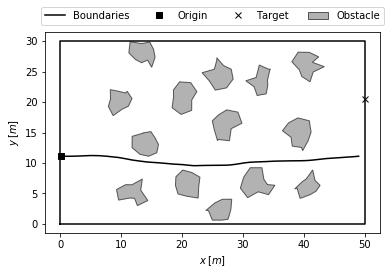

In [24]:
mis = main()
mis.plot_traj(); plt.show()

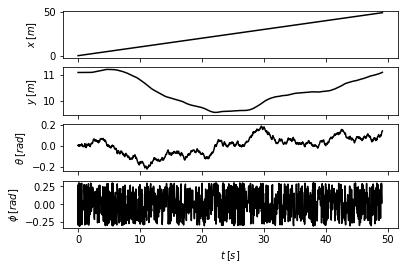

In [25]:
mis.plot_records(); plt.show()

In [26]:
res = mis.simulate(mis.controls, mis.times)
print('This was {0:.2f}% succesfull!'.format(res*100))

This was 81.64% succesfull!
